In [1]:
#Installing required libraries
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tensorflow import keras
import glob as gb
import pandas as pd
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D ,LeakyReLU

In [2]:
#Mounting Google Drive to Google Colab notebook
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#Path to the dataset
path = '/content/gdrive/MyDrive/CornImageDataset'

In [4]:
#Exploring dataset - number of images in each class
sub = []
count = []
for folder in os.listdir(path):
  sub.append(folder)
  fil = gb.glob(pathname=str(path + "/" + folder +"/*.*"))
  count.append(len(fil))
  print(folder,'-',len(fil))
print(sub)
print(count)

'''Output:
Blight - 1148
Common_Rust - 1316
Healthy - 1162
Gray_Leaf_Spot - 574
['Blight', 'Common_Rust', 'Healthy', 'Gray_Leaf_Spot']
[1148, 1316, 1162, 574]'''

Blight - 1148
Common_Rust - 1316
Healthy - 1162
Gray_Leaf_Spot - 574
['Blight', 'Common_Rust', 'Healthy', 'Gray_Leaf_Spot']
[1148, 1316, 1162, 574]


Text(0.5, 1.0, 'No. of Images by Class')

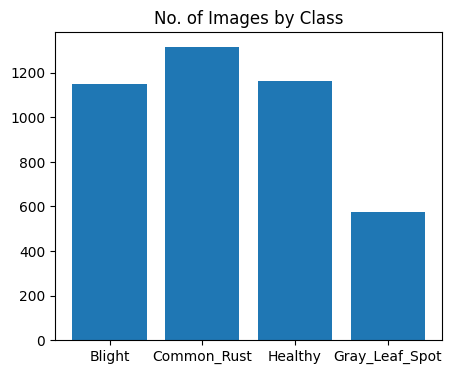

In [24]:
#Plotting figure showing number of images in each class
plt.figure(figsize=(5,4))
plt.bar(sub,count)
plt.title("No. of Images by Class")

In [5]:
#Passing weights to balance uneven data representation (These will cause model to pay more attention to examples from an under-represented class)
total = 0
for i in range(0,len(count)) :
    total +=count[i]

weight_for_0 = (1 / count[0]) * (total / 4.0)
weight_for_1 = (1 / count[1]) * (total / 4.0)
weight_for_2 = (1 / count[2]) * (total / 4.0)
weight_for_3 = (1 / count[3]) * (total / 4.0)

class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2, 3: weight_for_3}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))
print('Weight for class 2: {:.2f}'.format(weight_for_2))
print('Weight for class 3: {:.2f}'.format(weight_for_3))

'''Output:
Weight for class 0: 0.91
Weight for class 1: 0.80
Weight for class 2: 0.90
Weight for class 3: 1.83'''

Weight for class 0: 0.91
Weight for class 1: 0.80
Weight for class 2: 0.90
Weight for class 3: 1.83


In [6]:
#Generating dataset from image files in a directory
IMG_SIZE = (299, 299) # resolution
BATCH_SIZE = 128
train_dataset = image_dataset_from_directory(path,
                                             shuffle=True,
                                             labels='inferred',
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.1,
                                             subset='training',
                                             color_mode='rgb',
                                             seed=42)
validation_dataset = image_dataset_from_directory(path,
                                             shuffle=True,
                                             labels='inferred',
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.1,
                                             subset='validation',
                                             color_mode='rgb',
                                             seed=42)
'''Output:
Found 4200 files belonging to 4 classes.
Using 3780 files for training.
Found 4200 files belonging to 4 classes.
Using 420 files for validation.'''

Found 4200 files belonging to 4 classes.
Using 3780 files for training.
Found 4200 files belonging to 4 classes.
Using 420 files for validation.


In [7]:
#Retrieving the list of class names from the dataset
class_names = train_dataset.class_names
class_names
'''Output:
['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']'''

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

In [8]:
#Creating random transformations (to be applied to the input data to increase the size and diversity of the training dataset)
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomHeight(0.2),
  tf.keras.layers.RandomWidth(0.2),
])

In [9]:
#Subsetting images based on their corresponding labels to visualize
plt.figure(figsize=(20,8))
Common_Rust = []
Gray_Leaf_Spot = []
Blight =[]
Healthy = []
for images , labels in train_dataset.take(1):
    for i in range(50):
        if class_names[labels[i]] == "Common_Rust":
            Common_Rust.append(images[i].numpy().astype("uint8"))
        if  class_names[labels[i]] == "Gray_Leaf_Spot":
            Gray_Leaf_Spot.append(images[i].numpy().astype("uint8"))
        if  class_names[labels[i]] == "Blight":
            Blight.append(images[i].numpy().astype("uint8"))
        if  class_names[labels[i]] == "Healthy":
            Healthy.append(images[i].numpy().astype("uint8"))

<Figure size 2000x800 with 0 Axes>

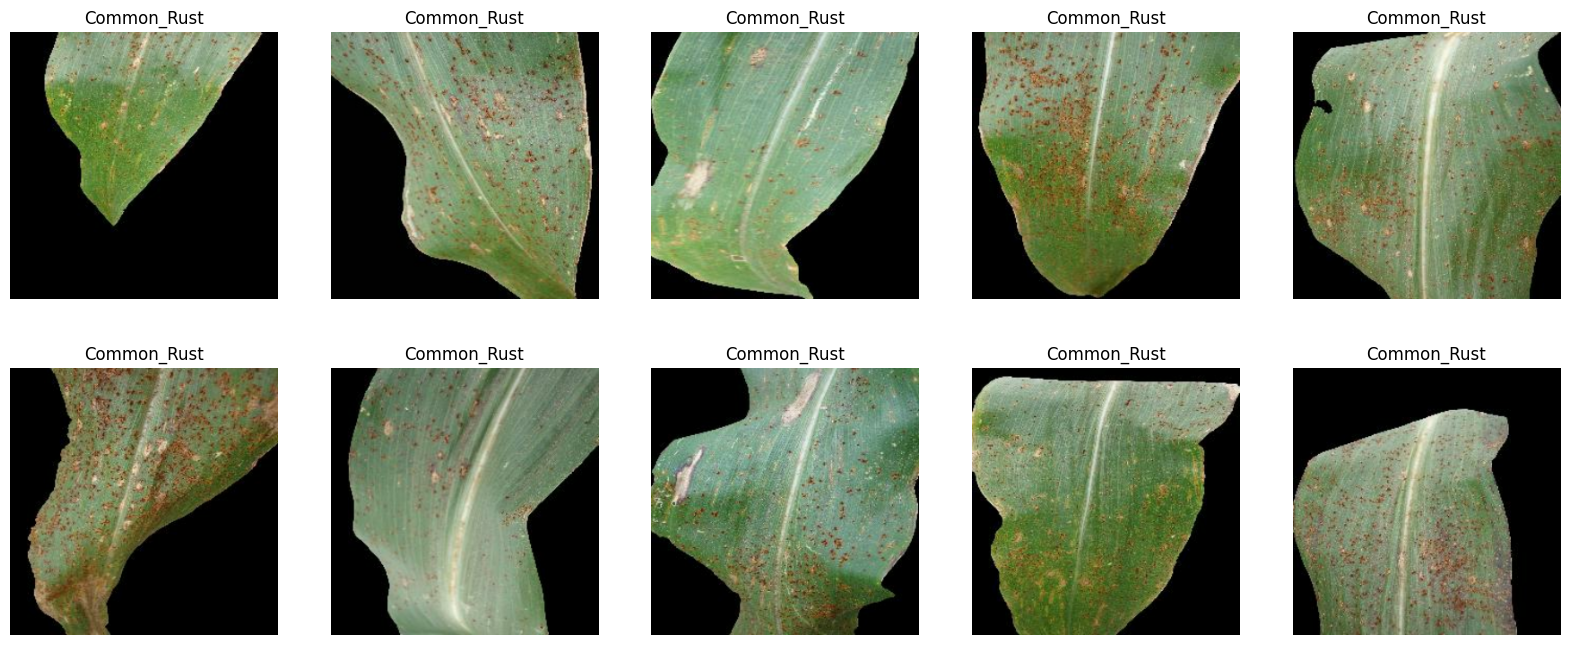

In [25]:
#Visualizing 'Common Rust' images
plt.figure(figsize=(20,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(Common_Rust[i])
    plt.axis("off")
    plt.title("Common_Rust")

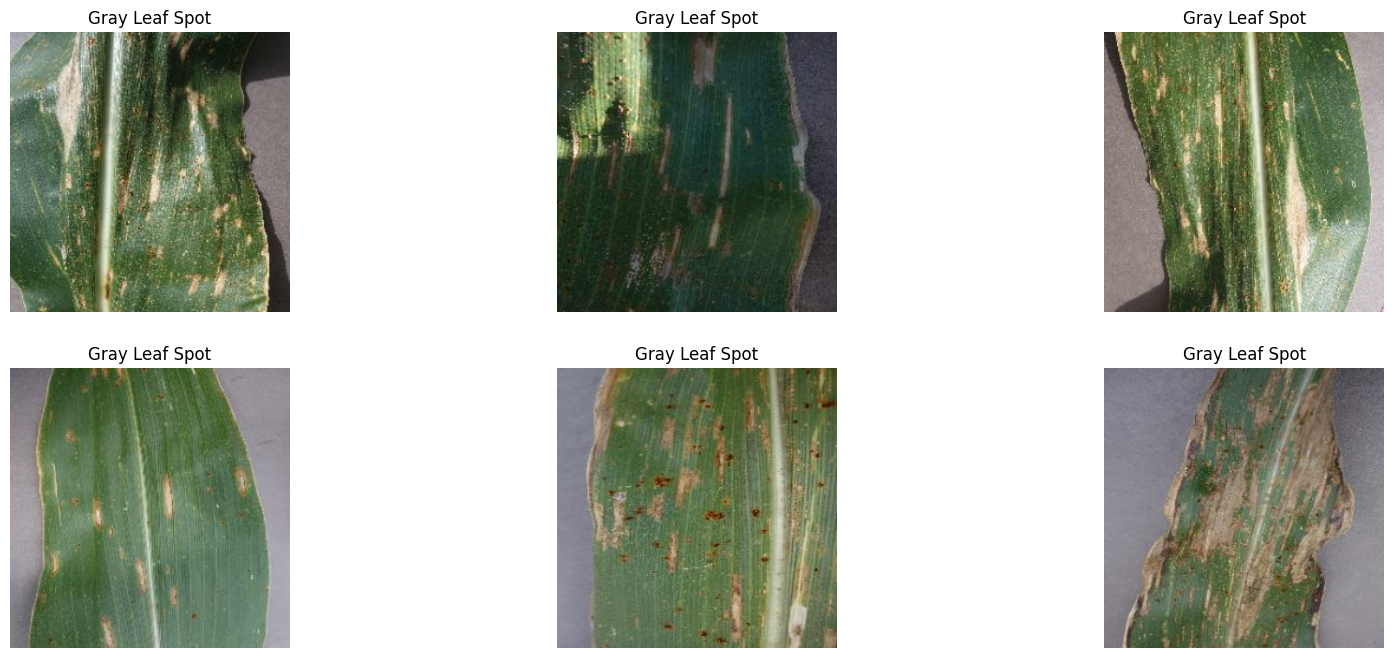

In [26]:
#Visualizing 'Gray Leaf Spot' images
plt.figure(figsize=(20,8))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(Gray_Leaf_Spot[i])
    plt.axis("off")
    plt.title("Gray Leaf Spot")

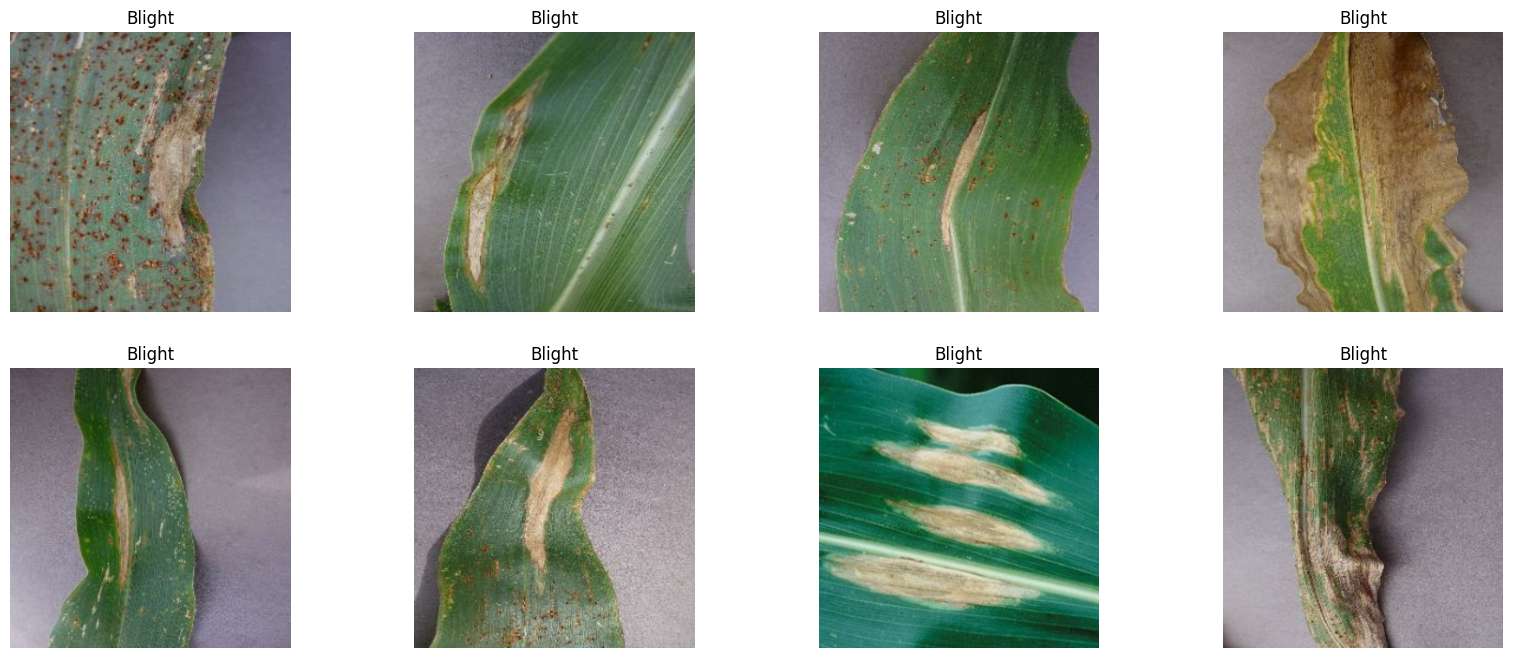

In [27]:
#Visualizing 'Blight' images
plt.figure(figsize=(20,8))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(Blight[i])
    plt.axis("off")
    plt.title("Blight")

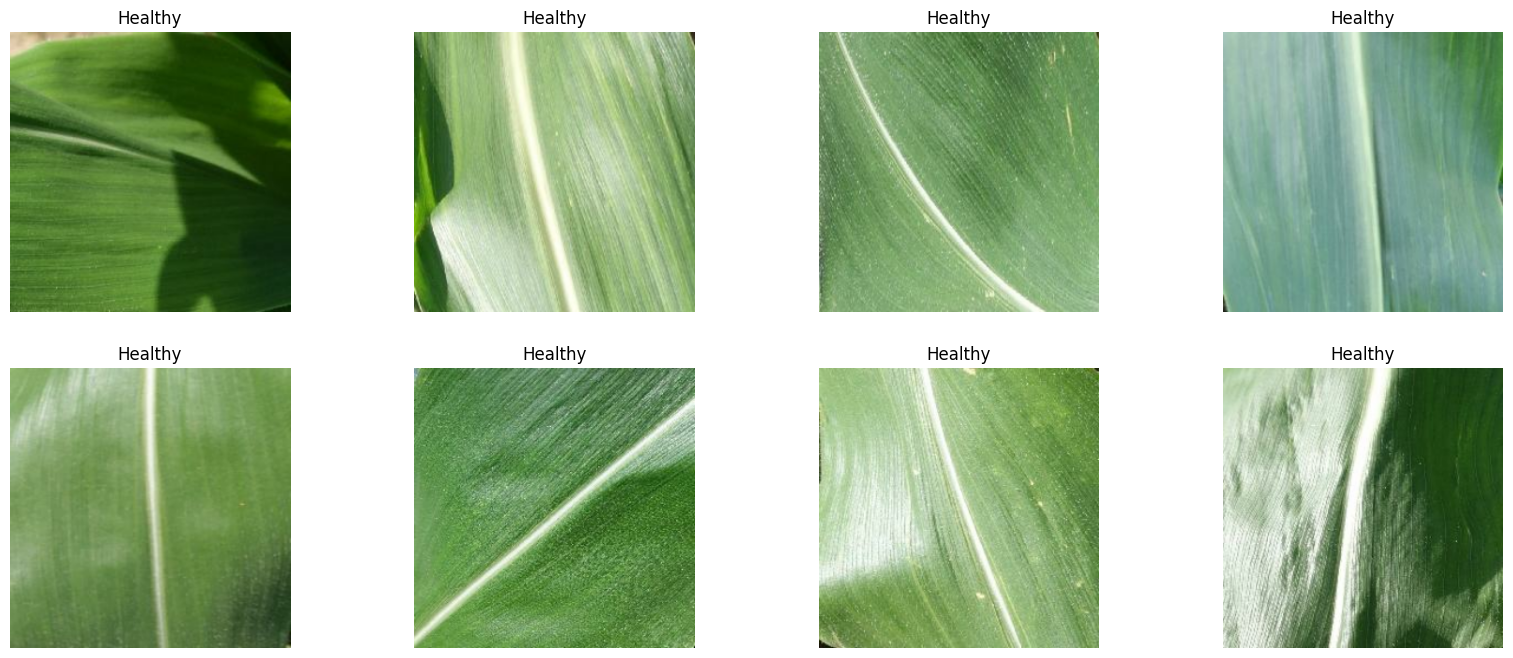

In [28]:
#Visualizing 'Healthy' images
plt.figure(figsize=(20,8))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(Healthy[i])
    plt.axis("off")
    plt.title("Healthy")

In [10]:
#Optimizing the performance of training dataset pipeline (preparing data batches in advance while the model is still training on the previous batch)
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

In [11]:
#Loading Imagenet pre-trained model 'InceptionV3' without its fully connected layers (to obtain high-level features from input images)
IMG_SHAPE = IMG_SIZE +(3,)
base_model = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE, include_top= False,weights='imagenet')

In [12]:
#To preprocess input images for the InceptionV3 model
type(base_model)
preprocess_input = tf.keras.applications.inception_v3.preprocess_input

In [13]:
#Checking the type of 'base_model'
type(base_model)
'''Output:
keras.engine.functional.Functional'''

keras.engine.functional.Functional

In [14]:
#Checking the number of layers in InceptionV3 model
nb_layers = len(base_model.layers)
print("Numbers of Layers =" , nb_layers)
print(base_model.layers[nb_layers - 2].name)  # pre- Last name
print(base_model.layers[nb_layers - 1].name)
'''Output:
Numbers of Layers = 311
activation_93
mixed10'''

Numbers of Layers = 311
activation_93
mixed10


In [15]:
#Iterate over first batch (128 image) in trainset
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)
'''Output:
(128, 8, 8, 2048)'''

(128, 8, 8, 2048)


In [16]:
#Defining a tf.keras model for leaf disease classification
def plant_leaf_model(image_shape=IMG_SIZE):
    image_shape = image_shape + (3,)
    #Load the pre-trained model weights
    resnet_model = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE, include_top= False,weights='imagenet')
    resnet_model.trainable = True
    for layer in resnet_model.layers[0 : 291]:
        layer.trainable = False

    inputs = tf.keras.Input(image_shape)
    x = data_augmentation(inputs)
    x = preprocess_input(x)
    x = resnet_model(x , training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    prediction_layer = tf.keras.layers.Dense(4 ,activation = "softmax")
    outputs = prediction_layer(x)
    model = tf.keras.Model(inputs, outputs)
    model.summary()
    return model

In [17]:
#Getting above defined model's summary
Plant_Leaf_Model = plant_leaf_model(IMG_SIZE)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 sequential (Sequential)     (None, None, None, 3)     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, None, None, 3)    0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, None, None, 3)    0         
 a)                                                              
                                                                 
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0     

In [18]:
#Compiling the model with Nadam optimizer with base learning rate 0.001
base_learning_rate = 0.001
Plant_Leaf_Model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=base_learning_rate),
                           loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                           metrics=['accuracy'])

In [19]:
#Training the model
history = Plant_Leaf_Model.fit(train_dataset , verbose=2 , epochs=10 ,class_weight=class_weight,
                               validation_data=validation_dataset , use_multiprocessing= True)
'''Output:
Epoch 1/10
30/30 - 283s - loss: 1.0098 - accuracy: 0.7492 - val_loss: 0.2561 - val_accuracy: 0.8929 - 283s/epoch - 9s/step
Epoch 2/10
30/30 - 203s - loss: 0.2040 - accuracy: 0.9098 - val_loss: 0.2304 - val_accuracy: 0.9024 - 203s/epoch - 7s/step
Epoch 3/10
30/30 - 215s - loss: 0.1692 - accuracy: 0.9291 - val_loss: 0.1845 - val_accuracy: 0.9167 - 215s/epoch - 7s/step
Epoch 4/10
30/30 - 195s - loss: 0.1536 - accuracy: 0.9381 - val_loss: 0.1926 - val_accuracy: 0.9286 - 195s/epoch - 7s/step
Epoch 5/10
30/30 - 192s - loss: 0.1407 - accuracy: 0.9418 - val_loss: 0.2008 - val_accuracy: 0.9167 - 192s/epoch - 6s/step
Epoch 6/10
30/30 - 182s - loss: 0.1256 - accuracy: 0.9476 - val_loss: 0.1686 - val_accuracy: 0.9286 - 182s/epoch - 6s/step
Epoch 7/10
30/30 - 188s - loss: 0.1177 - accuracy: 0.9492 - val_loss: 0.1750 - val_accuracy: 0.9357 - 188s/epoch - 6s/step
Epoch 8/10
30/30 - 169s - loss: 0.1197 - accuracy: 0.9468 - val_loss: 0.1691 - val_accuracy: 0.9310 - 169s/epoch - 6s/step
Epoch 9/10
30/30 - 142s - loss: 0.1092 - accuracy: 0.9532 - val_loss: 0.1415 - val_accuracy: 0.9405 - 142s/epoch - 5s/step
Epoch 10/10
30/30 - 151s - loss: 0.1024 - accuracy: 0.9571 - val_loss: 0.2015 - val_accuracy: 0.9143 - 151s/epoch - 5s/step'''

Epoch 1/10
30/30 - 283s - loss: 1.0098 - accuracy: 0.7492 - val_loss: 0.2561 - val_accuracy: 0.8929 - 283s/epoch - 9s/step
Epoch 2/10
30/30 - 203s - loss: 0.2040 - accuracy: 0.9098 - val_loss: 0.2304 - val_accuracy: 0.9024 - 203s/epoch - 7s/step
Epoch 3/10
30/30 - 215s - loss: 0.1692 - accuracy: 0.9291 - val_loss: 0.1845 - val_accuracy: 0.9167 - 215s/epoch - 7s/step
Epoch 4/10
30/30 - 195s - loss: 0.1536 - accuracy: 0.9381 - val_loss: 0.1926 - val_accuracy: 0.9286 - 195s/epoch - 7s/step
Epoch 5/10
30/30 - 192s - loss: 0.1407 - accuracy: 0.9418 - val_loss: 0.2008 - val_accuracy: 0.9167 - 192s/epoch - 6s/step
Epoch 6/10
30/30 - 182s - loss: 0.1256 - accuracy: 0.9476 - val_loss: 0.1686 - val_accuracy: 0.9286 - 182s/epoch - 6s/step
Epoch 7/10
30/30 - 188s - loss: 0.1177 - accuracy: 0.9492 - val_loss: 0.1750 - val_accuracy: 0.9357 - 188s/epoch - 6s/step
Epoch 8/10
30/30 - 169s - loss: 0.1197 - accuracy: 0.9468 - val_loss: 0.1691 - val_accuracy: 0.9310 - 169s/epoch - 6s/step
Epoch 9/10
30/30

1/1 [==============================] - 0s 36ms/step


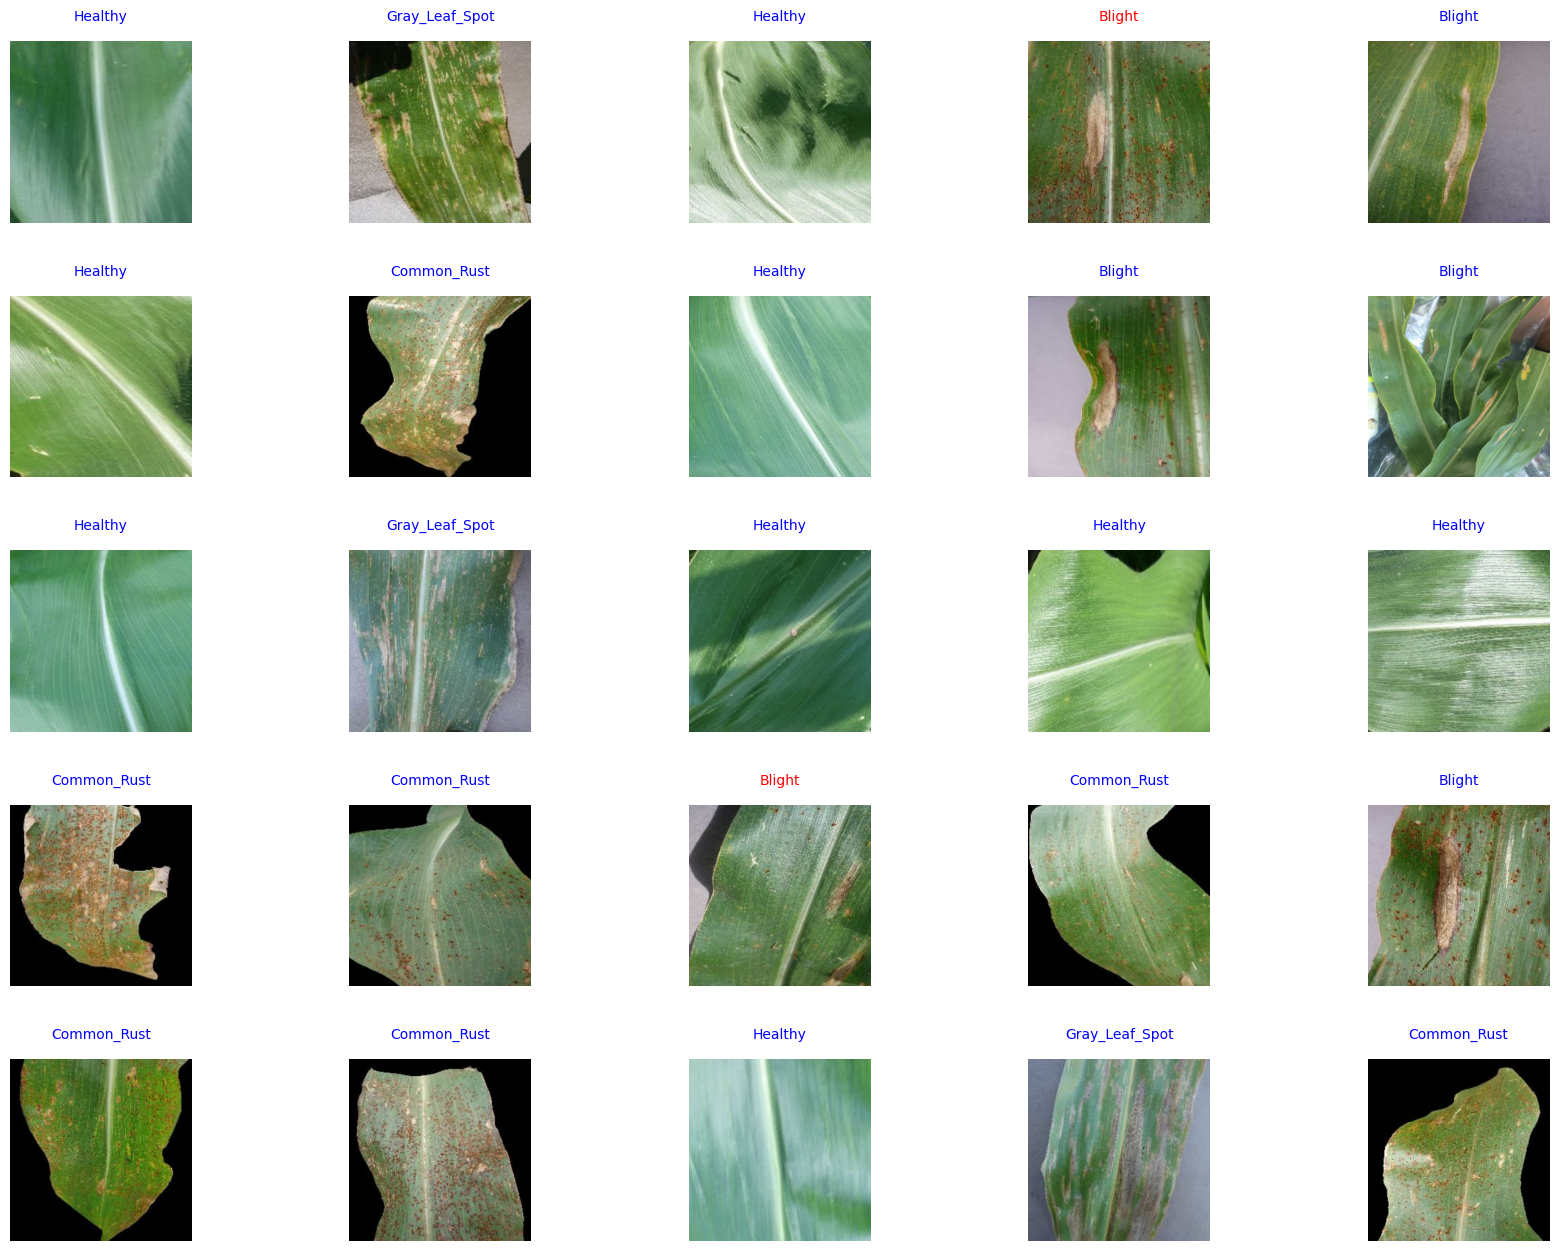

In [22]:
#Plotting images with predicted or actual (if predicted is wrong) labels
plt.figure(figsize=(20, 15))
for images, labels in train_dataset.take(1):
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        im2 = images[i].numpy().astype("uint8")
        img2 = tf.expand_dims(im2, 0)
        predict = Plant_Leaf_Model.predict(img2)
        predicted= class_names[np.argmax(predict)]
        actual = class_names [labels[i].numpy().astype("uint8")]
        if (actual == predicted):
            plt.title(predicted, fontsize=10, color= 'blue', pad=15);
        else :
            plt.title(actual, fontsize=10, color= 'red' ,pad=15);
        plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9,
                            top=0.9, wspace=0.4,hspace=0.4)

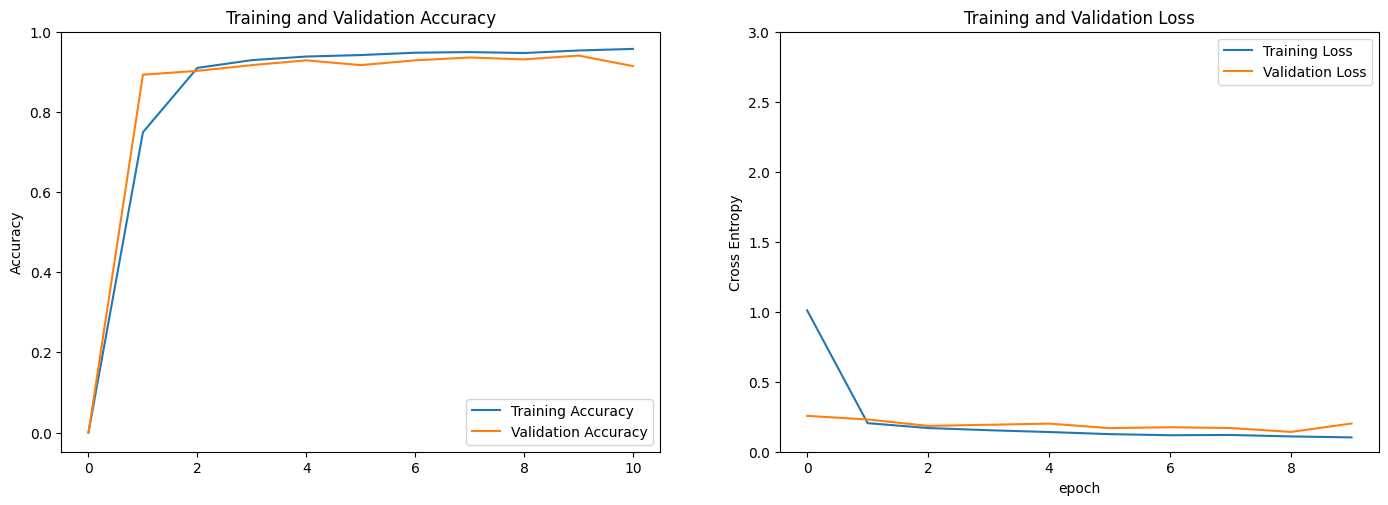

In [23]:
#Plotting accuracy
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(17, 12))
plt.subplot(2, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()